In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [326]:
chemicals = pd.read_csv("chemicals.csv")

In [327]:
chemicals["chemical_species"].unique()

array(['Uranium', 'Arsenic', 'DEHP', 'Nitrates', 'Halo-Acetic Acid',
       'Trihalomethane'], dtype=object)

In [328]:
chemicals["unit_measurement"].unique()

array(['micrograms/L', 'milligrams/L'], dtype=object)

In [329]:
earnings = pd.read_csv("earnings.csv", encoding='latin-1')

In [330]:
earnings.columns

Index(['geo_id', 'fips', 'county', 'total_med', 'total_agri_fish_mine',
       'agri_fish_hunt', 'mining_quarrying_oilgas_extract', 'construction',
       'manufacturing', 'wholesale_trade', 'retail_trade',
       'transport_warehouse_utilities', 'transport_warehouse', 'utilities',
       'information', 'fin_ins_realest', 'fin_ins', 'realest_rent_lease',
       'total_prof_sci_mgmt_admin', 'prof_sci_tech', 'mgmt', 'admin_sup',
       'total_edu_health_social', 'edu_serv', 'health_social',
       'total_arts_ent_acc_food', 'arts_ent_rec', 'acc_food_serv', 'other_ser',
       'pub_admin', 'year'],
      dtype='object')

In [331]:
industries = pd.read_csv("industry_occupation.csv", encoding='latin-1')

In [332]:
contaminants= chemicals[['county','fips','year', 'pop_served','chemical_species', 'value', 'unit_measurement']]
# contaminants = contaminants.replace({'contaminant_level': {'Less than or equal MCL': 1, 'Non Detect':0, 'Greater than MCL':2}})
contaminants.value[contaminants['unit_measurement'] == 'milligrams/L'] *= 1000
contaminants = contaminants[contaminants['pop_served'] != 0]

C:\Users\Justin Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Justin Xu\Anaconda3\lib\site-packages\pandas\core\generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Justin Xu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(co

In [333]:
contaminants.head()

,county,fips,year,pop_served,chemical_species,value,unit_measurement
0,Alameda,6001,2000,57200,Uranium,1.54,micrograms/L
1,Alameda,6001,2000,26400,Uranium,1.64,micrograms/L
2,Alameda,6001,2000,70600,Uranium,1.64,micrograms/L
3,Alameda,6001,2000,72500,Uranium,1.64,micrograms/L
4,Alameda,6001,2000,100,Uranium,4.51,micrograms/L


In [137]:
def weighted_average(df):
    pop = df['pop_served']
    level = df['value']
    return (pop*level).sum() / pop.sum()
    
contaminant_levels = contaminants.groupby(['fips', 'year', 'chemical_species']).apply(weighted_average)

In [355]:
df = contaminant_levels.unstack()
earnings_med = earnings[['fips', 'year', 'total_med']]
dropped_industries = industries.drop(['county', 'geo_id'], axis=1)
earnings_med = earnings_med.set_index(['fips', 'year'])
dropped_industries = dropped_industries.set_index(['fips', 'year'])
df = df.join(earnings_med)
df = df.join(dropped_industries)
df.index = pd.MultiIndex.from_tuples(df.index, names=['fips', 'years'])

(array([  1.72410000e+04,   2.64300000e+03,   1.18400000e+03,
          4.67000000e+02,   1.71000000e+02,   6.10000000e+01,
          4.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([     0.        ,   1544.26603746,   3088.53207493,   4632.79811239,
          6177.06414986,   7721.33018732,   9265.59622479,  10809.86226225,
         12354.12829972,  13898.39433718,  15442.66037465]),
 <a list of 10 Patch objects>)

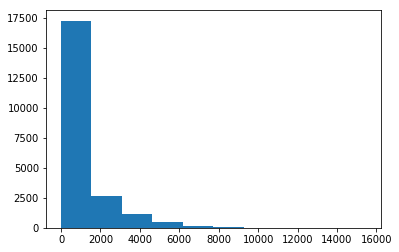

In [334]:
c = 'Nitrates'
plt.hist(df[c][df[c] == df[c]], bins=10)

In [335]:
df.columns

Index(['years', 'Arsenic', 'DEHP', 'Halo-Acetic Acid', 'Nitrates',
       'Trihalomethane', 'Uranium', 'total_med', 'total_employed',
       'agriculture', 'construction', 'manufacturing', 'wholesale_trade',
       'retail_trade', 'transport_utilities', 'information',
       'finance_insurance_realestate', 'prof_scientific_waste', 'edu_health',
       'arts_recreation', 'other', 'public_admin'],
      dtype='object')

Arsenic


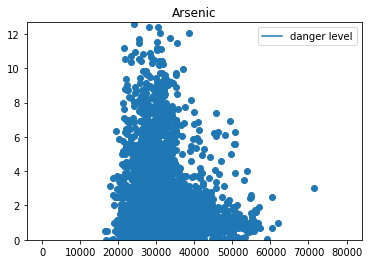

DEHP


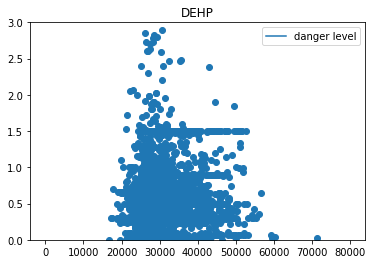

Halo-Acetic Acid


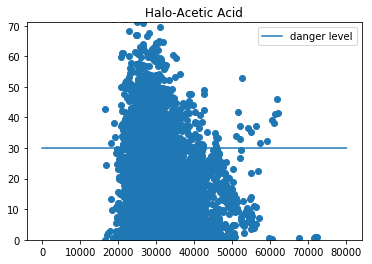

Nitrates


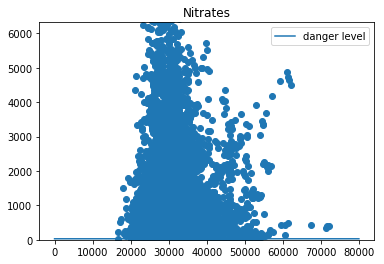

Trihalomethane


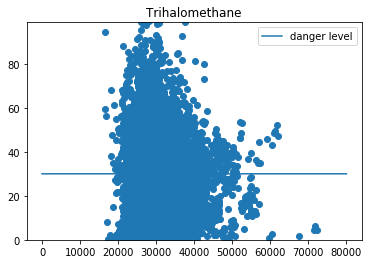

Uranium


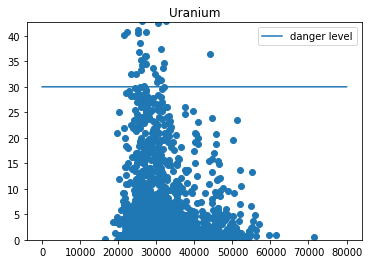

In [637]:
x = np.arange(80000)
for chemical in ['Arsenic', 'DEHP', 'Halo-Acetic Acid', 'Nitrates', 'Trihalomethane','Uranium']:
    plt.scatter(df['total_med'],df[chemical], label=None)
    plt.plot(x, np.ones(80000)*30, '-', label = 'danger level')
    print(chemical)
    plt.ylim(0, np.percentile(df[chemical].dropna(),99))
    plt.title(chemical)
    plt.legend()
    plt.show()


In [356]:
new_df = df.reset_index()
new_df = new_df.set_index('fips')
new_df.head()

,years,Arsenic,DEHP,Halo-Acetic Acid,Nitrates,Trihalomethane,Uranium,total_med,total_employed,agriculture,...,wholesale_trade,retail_trade,transport_utilities,information,finance_insurance_realestate,prof_scientific_waste,edu_health,arts_recreation,other,public_admin
fips,,,,,,,,,,,,,,,,,,,,,
6001,2000,1.014271,1.500000,NaN,347.241137,NaN,1.617374,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6001,2001,1.014283,1.500000,NaN,370.584590,NaN,0.640457,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6001,2002,1.006312,1.561274,NaN,489.199983,NaN,1.900092,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6001,2003,1.000000,1.500000,NaN,477.853148,NaN,0.777385,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6001,2004,1.001428,1.500000,NaN,504.301684,NaN,1.280558,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [436]:
# (df[df['years'] == 2016] - df[df['years'] == 2010]) 
chemical_df = new_df.loc[:, 'years':'Uranium']
occupation_df = pd.concat([new_df.loc[:, 'years'], new_df.loc[:, 'total_med':'public_admin']], axis=1)

In [566]:
change = (chemical_df[chemical_df['years'] == 2016] - chemical_df[chemical_df['years'] == 2010]) / 6 #/ chemical_df[chemical_df['years'] == 2010]
average = chemical_df.groupby('fips').mean()
mean_occupation = occupation_df.groupby('fips').mean()
average.head()
# mean_occupation.head()

,years,Arsenic,DEHP,Halo-Acetic Acid,Nitrates,Trihalomethane,Uranium
fips,,,,,,,
6001,2008.0,1.003892,1.555572,NaN,427.179037,NaN,0.966338
6003,2008.0,1.000000,1.500000,NaN,48.636260,NaN,1.478053
6005,2008.0,1.133532,1.500000,NaN,743.000360,NaN,2.850608
6007,2008.0,1.482147,1.500000,NaN,1579.113707,NaN,0.955509
6009,2008.0,1.011205,1.500000,NaN,170.188279,NaN,3.591678


In [561]:
income_chemical = pd.concat([new_df.loc[:, 'years':'Uranium'], new_df.loc[:, 'total_med']], axis=1)
income_chemical.head()

,years,Arsenic,DEHP,Halo-Acetic Acid,Nitrates,Trihalomethane,Uranium,total_med
fips,,,,,,,,
6001,2000,1.014271,1.500000,NaN,347.241137,NaN,1.617374,NaN
6001,2001,1.014283,1.500000,NaN,370.584590,NaN,0.640457,NaN
6001,2002,1.006312,1.561274,NaN,489.199983,NaN,1.900092,NaN
6001,2003,1.000000,1.500000,NaN,477.853148,NaN,0.777385,NaN
6001,2004,1.001428,1.500000,NaN,504.301684,NaN,1.280558,NaN


In [579]:
# combined = pd.concat([chemical_df, mean_occupation], axis=1)
# combined['income_bucket'] = (0 if combined['total_med'] < 25000 else 1 if combined['total_med'] < 30000 else 2 if combined['total_med'] < 35000 else 3)
# combined['income_bucket'] = combined['total_med'] < 25000
# def bucket
def bucket(x):
    if x < 25000:
        return 0
    elif x < 30000:
        return 1
    elif x < 35000:
        return 2
    elif x > 35000:
        return 3
new_df['income_bucket'] = new_df['total_med'].apply(bucket)
new_df.head()
change['income_bucket'] = mean_occupation['total_med'].apply(bucket)
change.head()
average['income_bucket'] = mean_occupation['total_med'].apply(bucket)
average.head()

,years,Arsenic,DEHP,Halo-Acetic Acid,Nitrates,Trihalomethane,Uranium,income_bucket
fips,,,,,,,,
6001,2008.0,1.003892,1.555572,NaN,427.179037,NaN,0.966338,3.0
6003,2008.0,1.000000,1.500000,NaN,48.636260,NaN,1.478053,2.0
6005,2008.0,1.133532,1.500000,NaN,743.000360,NaN,2.850608,3.0
6007,2008.0,1.482147,1.500000,NaN,1579.113707,NaN,0.955509,1.0
6009,2008.0,1.011205,1.500000,NaN,170.188279,NaN,3.591678,3.0


In [548]:
from scipy import stats

Arsenic


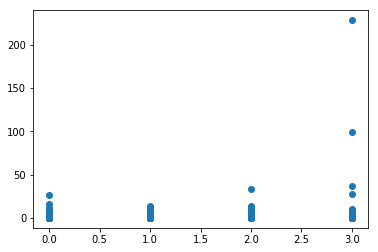

LinregressResult(slope=0.53100680275704049, intercept=1.2811975477527167, rvalue=0.0643845693443309, pvalue=0.015679792683806468, stderr=0.21949447973030004)
DEHP


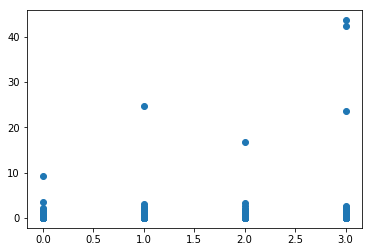

LinregressResult(slope=0.20872204060054178, intercept=0.44420511076244196, rvalue=0.085586858768494339, pvalue=0.0029337483441608551, stderr=0.070024739139112335)
Halo-Acetic Acid


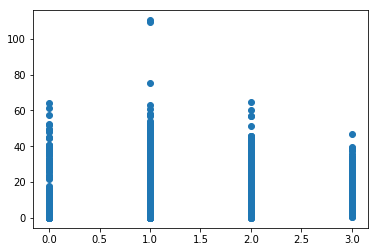

LinregressResult(slope=-0.61031492256366637, intercept=17.545475011458215, rvalue=-0.036352903728632369, pvalue=0.16826689917596388, stderr=0.44274177859650193)
Nitrates


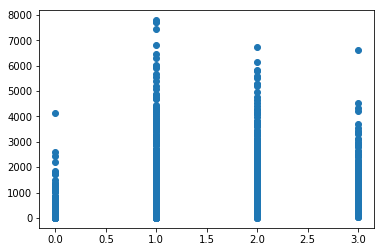

LinregressResult(slope=105.6818502957057, intercept=862.84632539146514, rvalue=0.073993725886523753, pvalue=0.0065298931841440491, stderr=38.794343122424038)
Trihalomethane


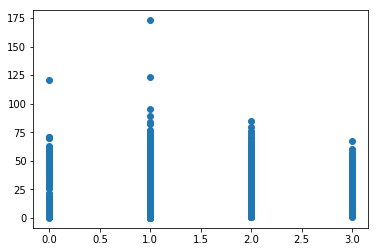

LinregressResult(slope=-0.35923925908444954, intercept=29.041050802689639, rvalue=-0.015387287341566008, pvalue=0.55987447471847873, stderr=0.61601755468626862)
Uranium


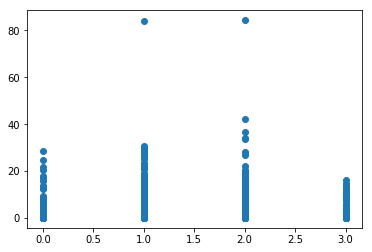

LinregressResult(slope=-0.046005595580887529, intercept=3.4327276612185811, rvalue=-0.0059799156472927703, pvalue=0.84696895852722642, stderr=0.23832739983171292)


In [568]:
# linreg = LinearRegression()
for chemical in ['Arsenic', 'DEHP', 'Halo-Acetic Acid', 'Nitrates', 'Trihalomethane','Uranium']:
    print(chemical)
    plt.scatter(average['income_bucket'], average[chemical])
    plt.show()
    vals = average[chemical] == average[chemical]
    print(stats.linregress(list(average['income_bucket'][vals]), list(average[chemical][vals])))
# list(change['Arsenic'])
# list(change['income_bucket'])

Arsenic
LinregressResult(slope=-0.11648766348083173, intercept=0.084778345892068341, rvalue=-0.060493119603150819, pvalue=0.073862279302109923, stderr=0.065090801665624254)
DEHP
LinregressResult(slope=-0.034322821091018516, intercept=0.049696825035360527, rvalue=-0.086109726527284713, pvalue=0.050817093143221449, stderr=0.017532989111399812)
Halo-Acetic Acid
LinregressResult(slope=0.083734198416843944, intercept=-0.38806514375573947, rvalue=0.024294777359444412, pvalue=0.4276920829156573, stderr=0.10553174888089116)
Nitrates
LinregressResult(slope=2.0178677340597613, intercept=3.052059976031956, rvalue=0.018041350296585698, pvalue=0.53513598614388536, stderr=3.2527016341463941)
Trihalomethane
LinregressResult(slope=0.06276638698006097, intercept=-0.2270403663654631, rvalue=0.022323287296709016, pvalue=0.46572571660474471, stderr=0.086015182946889576)
Uranium
LinregressResult(slope=-0.051670145380896711, intercept=-0.093504467382100623, rvalue=-0.021839579207037739, pvalue=0.72241749425

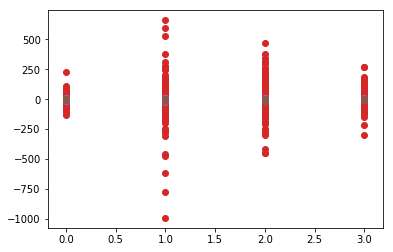

In [569]:
# linreg = LinearRegression()
for chemical in ['Arsenic', 'DEHP', 'Halo-Acetic Acid', 'Nitrates', 'Trihalomethane','Uranium']:
    print(chemical)
    plt.scatter(change['income_bucket'], change[chemical])
#     plt.show()
    vals = change[chemical] == change[chemical]
    print(stats.linregress(list(change['income_bucket'][vals]), list(change[chemical][vals])))
# list(change['Arsenic'])
# list(change['income_bucket'])

In [605]:
bucket_0 = new_df[new_df['income_bucket'] == 0].groupby('years').mean().loc[:,'Arsenic':'Uranium']
bucket_1 = new_df[new_df['income_bucket'] == 1].groupby('years').mean().loc[:,'Arsenic':'Uranium']
bucket_2 = new_df[new_df['income_bucket'] == 2].groupby('years').mean().loc[:,'Arsenic':'Uranium']
bucket_3 = new_df[new_df['income_bucket'] == 3].groupby('years').mean().loc[:,'Arsenic':'Uranium']
# bucket_0 = new.groupby('years').mean().loc[:,'Arsenic':'Uranium']
bucket_2

,Arsenic,DEHP,Halo-Acetic Acid,Nitrates,Trihalomethane,Uranium
years,,,,,,
2010,1.858653,0.556525,15.967994,997.074639,27.850839,3.024514
2011,1.593138,1.585205,16.563942,1112.595043,29.528502,1.965555
2012,1.829637,0.549210,16.382018,1055.278723,31.593398,3.267723
2013,1.618845,0.495612,15.802864,1071.509921,28.327484,3.055611
2014,1.566770,0.551265,14.691224,1127.394640,27.087649,3.124469
2015,1.628207,0.523620,15.122550,1168.365605,26.877812,3.764129
2016,1.519531,0.500272,14.858037,1165.281121,26.216126,3.200168


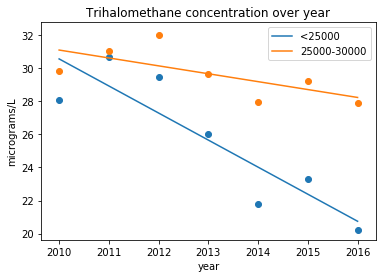

In [624]:
from numpy.polynomial.polynomial import polyfit

chemical = 'Trihalomethane'
frame = bucket_0
x = np.arange(2010, 2017)

b, m = polyfit(frame.index, frame[chemical], 1)
plt.scatter(frame.index, frame[chemical], label=None)
plt.plot(x, b + m * x, '-', label = '<25000')

b,m = polyfit(bucket_1.index, bucket_1[chemical],1)
plt.scatter(bucket_1.index, bucket_1[chemical],label=None)
plt.plot(x, b + m * x, '-', label = '25000-30000')

# b,m = polyfit(bucket_2.index, bucket_2[chemical],1)
# plt.scatter(bucket_2.index, bucket_2[chemical],label=None)
# plt.plot(x, b + m * x, '-', label = '30000-35000')

# b,m = polyfit(bucket_3.index, bucket_3[chemical],1)
# plt.scatter(bucket_3.index, bucket_3[chemical],label=None)
# plt.plot(x, b + m * x, '-', label = '>35000')

plt.xlabel('year')
plt.ylabel('micrograms/L')
plt.title(chemical+ ' concentration over year')
plt.legend()

In [590]:
time = pd.Series([2010,2011,2012,2013,2014,2015,2016], index=bucket_0.index)
for chem in bucket_0.columns:
    print()
    print(chem)
    print(stats.linregress(time, bucket_0[chem]))
    print('bucket 0', bucket_0[chem].corr(time))
    print()
    print(stats.linregress(time, bucket_1[chem]))
    print('bucket 1', bucket_1[chem].corr(time))
    print()
    print(stats.linregress(time, bucket_2[chem]))
    print('bucket 2', bucket_2[chem].corr(time))
    print()
    print(stats.linregress(time, bucket_3[chem]))
    print('bucket 3', bucket_3[chem].corr(time))       


Arsenic
LinregressResult(slope=0.0062284819176132945, intercept=-10.755368540468357, rvalue=0.098731565850758915, pvalue=0.83320382608877974, stderr=0.028074631344711061)
bucket 0 0.0987315658508

LinregressResult(slope=-0.059507139570818469, intercept=121.40925320368507, rvalue=-0.89525478285161486, pvalue=0.0064413050611546218, stderr=0.013244584062724565)
bucket 1 -0.895254782852

LinregressResult(slope=-0.043217711422502081, intercept=88.656507596918672, rvalue=-0.70969277773325512, pvalue=0.074043189761515152, stderr=0.019186437187865803)
bucket 2 -0.709692777733

LinregressResult(slope=-0.39445389165209144, intercept=795.96455846150855, rvalue=-0.81150988532300217, pvalue=0.026690147088254536, stderr=0.12702291411217001)
bucket 3 -0.811509885323

DEHP
LinregressResult(slope=-0.015313585549496718, intercept=31.273150586541018, rvalue=-0.42114083147199155, pvalue=0.3467264822155901, stderr=0.014749236981952706)
bucket 0 -0.421140831472

LinregressResult(slope=0.010069497325819235,

In [430]:
combined[combined['total_med'] < 25000].mean()
combined[(combined['total_med'] > 25000) & (combined['total_med'] < 35000)].mean()
combined[combined['total_med'] > 35000].mean()

years                                6.000000
Arsenic                             -0.236239
DEHP                                 0.062446
Halo-Acetic Acid                    -1.736970
Nitrates                            42.779246
Trihalomethane                      -0.829722
Uranium                             -1.662743
years                             2008.488908
total_med                        29334.307205
total_employed                  131648.071118
agriculture                       2512.275888
construction                      8095.756042
manufacturing                    13416.389825
wholesale_trade                   3752.158415
retail_trade                     15925.128114
transport_utilities               6550.461959
information                       2752.381480
finance_insurance_realestate      7917.395796
prof_scientific_waste            13745.236498
edu_health                       30654.437568
arts_recreation                  13726.032542
other                             

Arsenic


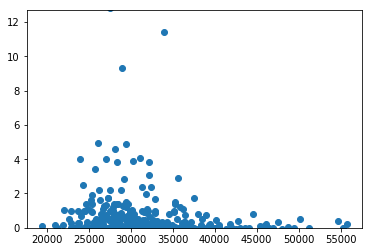

DEHP


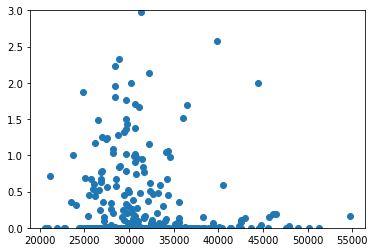

Halo-Acetic Acid


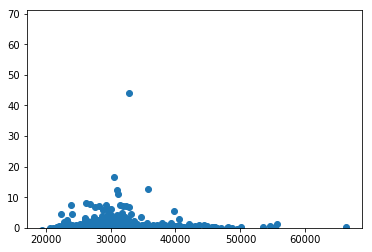

Nitrates


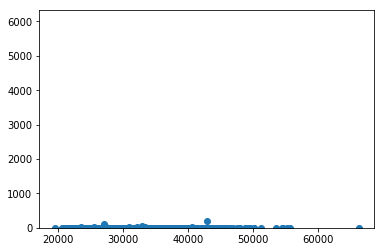

Trihalomethane


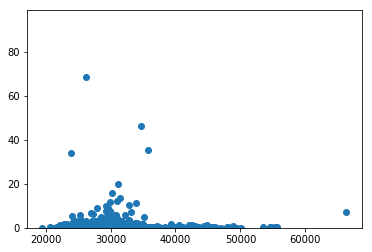

Uranium


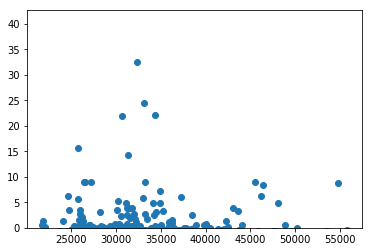

In [410]:
for chemical in ['Arsenic', 'DEHP', 'Halo-Acetic Acid', 'Nitrates', 'Trihalomethane','Uranium']:
    print(chemical)
    plt.scatter(combined['total_med'], combined[chemical])
    plt.ylim(np.percentile(df[chemical].dropna(), 0), np.percentile(df[chemical].dropna(),99))
    plt.show()